<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Monkey-Pox in Patients using Machine Learning</h1>
</div>

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- Kaggle
    
Problem Statement:- Build a machine learning-based approach to predict the Monkey-Pox in Patients

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [227]:
# Data manipulation
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
import sklearn as sk
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))
print('scikit-learn version {}'.format(sk.__version__))

CatBoost version 1.1
NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.0.2
xgboost version 1.6.2
lightgbm version 3.3.3
scikit-learn version 1.0.2


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Original Data" data in "main_data" Variable 

In [228]:
main_data = pd.read_csv (r'C:\Users\PC\Pictures\Kaggle\Monkey-Pox\DATA.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of data including Categorical Variable
- Check Null Entries in data 


In [229]:
print("Data Types of Data:-\n")
print(main_data.info(),'\n')
print('-------------'*9)
print("Shape of Data:-\n")
print(main_data.shape,'\n')
print('-------------'*9)

Data Types of Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB
None 

-------------------------------

In [230]:
print("About Data:-\n")
print(main_data.head(),'\n')
print('-------------'*9)

About Data:-

  Patient_ID     Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  \
0         P0                 None        False         True           True   
1         P1                Fever         True        False           True   
2         P2                Fever        False         True           True   
3         P3                 None         True        False          False   
4         P4  Swollen Lymph Nodes         True         True           True   

   Oral Lesions  Solitary Lesion  Swollen Tonsils  HIV Infection  \
0          True            False             True          False   
1          True            False            False           True   
2         False            False            False           True   
3         False             True             True           True   
4         False            False             True           True   

   Sexually Transmitted Infection MonkeyPox  
0                           False  Negative  
1               

In [231]:
print("About Data:-\n")
print(main_data.tail(),'\n')
print('-------------'*9)

About Data:-

      Patient_ID     Systemic Illness  Rectal Pain  Sore Throat  \
24995     P24995                 None         True         True   
24996     P24996                Fever        False         True   
24997     P24997                 None         True         True   
24998     P24998  Swollen Lymph Nodes        False         True   
24999     P24999  Swollen Lymph Nodes        False        False   

       Penile Oedema  Oral Lesions  Solitary Lesion  Swollen Tonsils  \
24995          False          True             True            False   
24996           True         False             True             True   
24997          False         False             True             True   
24998          False          True             True             True   
24999           True         False            False             True   

       HIV Infection  Sexually Transmitted Infection MonkeyPox  
24995          False                            True  Positive  
24996           True

In [232]:
main_data.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# main_data.describe()  

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,4,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [233]:
print("Checking Null entries & their Percentage in Data:-\n\n")
missing_val_main_data=pd.DataFrame(zip(main_data.isnull().sum(),main_data.isnull().sum()*100/len(main_data)),columns=['Missing Values','Percentage Missing Values'],index=main_data.columns)
missing_val_main_data

Checking Null entries & their Percentage in Data:-




,Missing Values,Percentage Missing Values
Patient_ID,0,0.0
Systemic Illness,0,0.0
Rectal Pain,0,0.0
Sore Throat,0,0.0
Penile Oedema,0,0.0
Oral Lesions,0,0.0
Solitary Lesion,0,0.0
Swollen Tonsils,0,0.0
HIV Infection,0,0.0
Sexually Transmitted Infection,0,0.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about Data

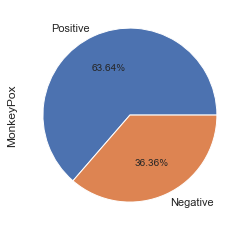

In [234]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
main_data.MonkeyPox.value_counts().plot.pie(autopct="%0.2f%%");

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64


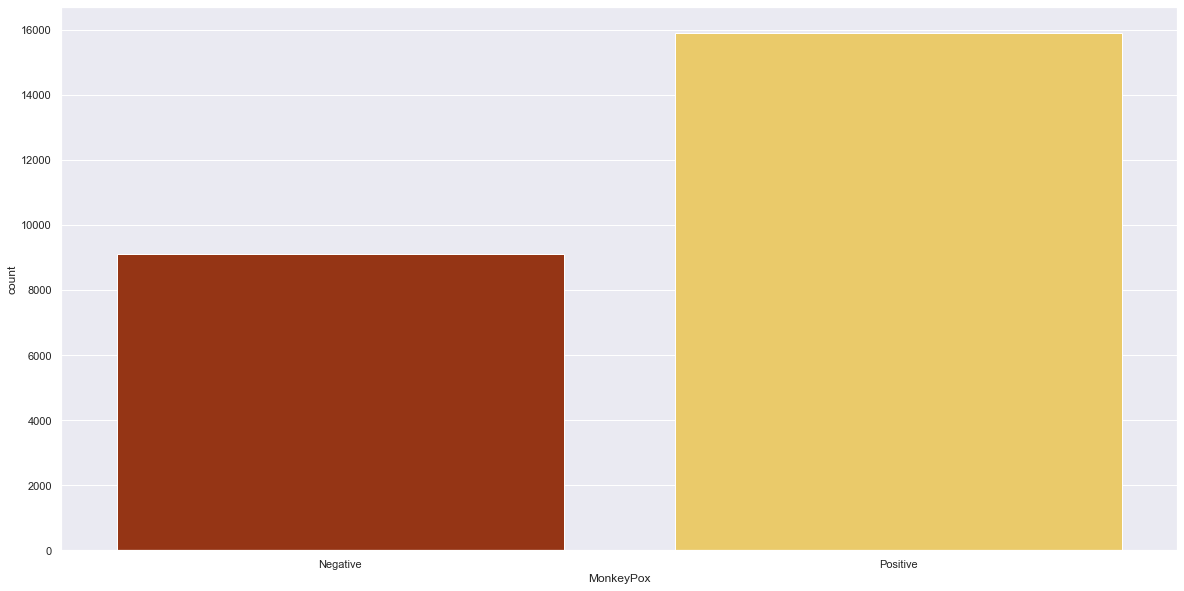

In [235]:
plt.figure(figsize=(20,10))
sns.countplot(x=main_data["MonkeyPox"], palette = 'afmhot');
print(main_data["MonkeyPox"].value_counts())

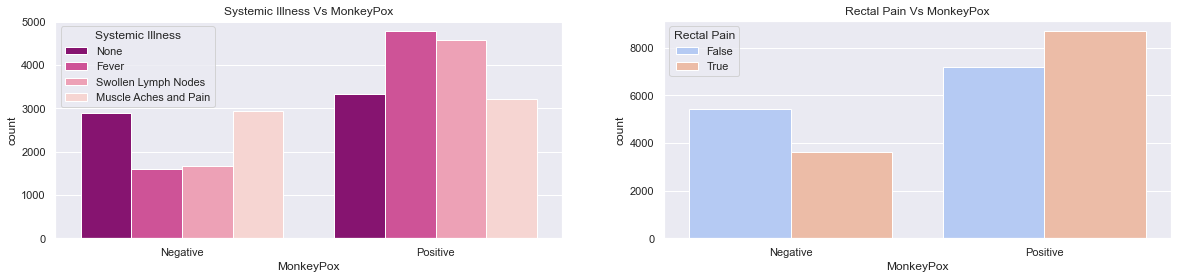

In [236]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('Systemic Illness Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='Systemic Illness', palette = 'RdPu_r');
plt.subplot(122)
plt.title('Rectal Pain Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='Rectal Pain', palette = 'coolwarm');

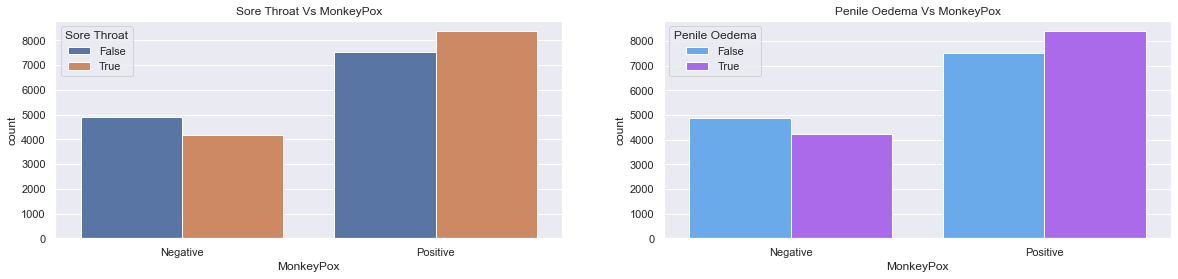

In [237]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('Sore Throat Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='Sore Throat');
plt.subplot(122)
plt.title('Penile Oedema Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='Penile Oedema',  palette = 'cool');

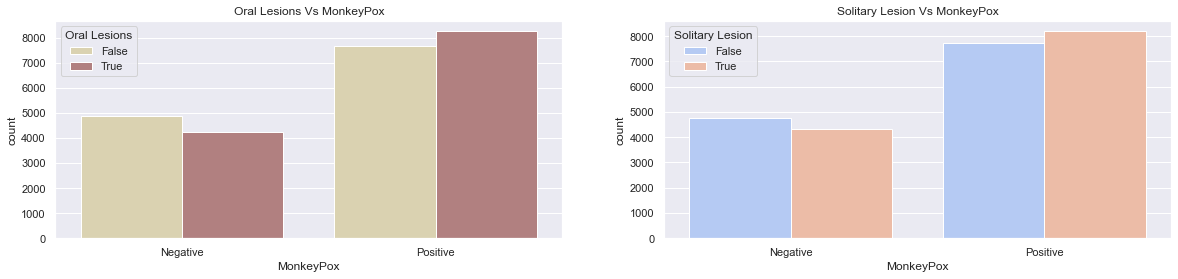

In [238]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('Oral Lesions Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='Oral Lesions', palette = 'pink_r');
plt.subplot(122)
plt.title('Solitary Lesion Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='Solitary Lesion', palette = 'coolwarm');

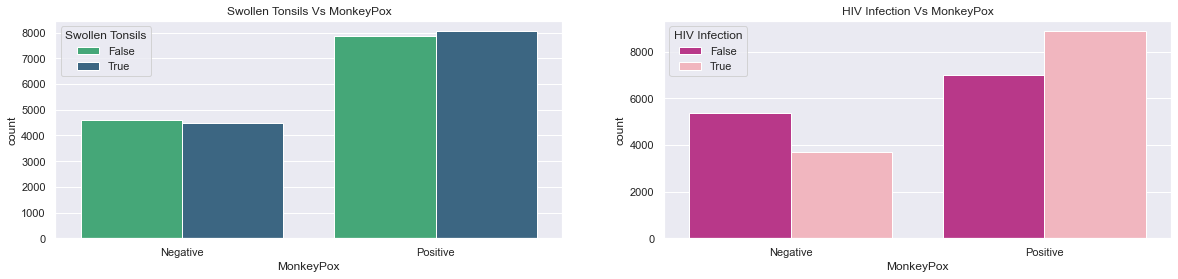

In [239]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('Swollen Tonsils Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='Swollen Tonsils', palette = 'viridis_r');
plt.subplot(122)
plt.title('HIV Infection Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='HIV Infection', palette = 'RdPu_r');

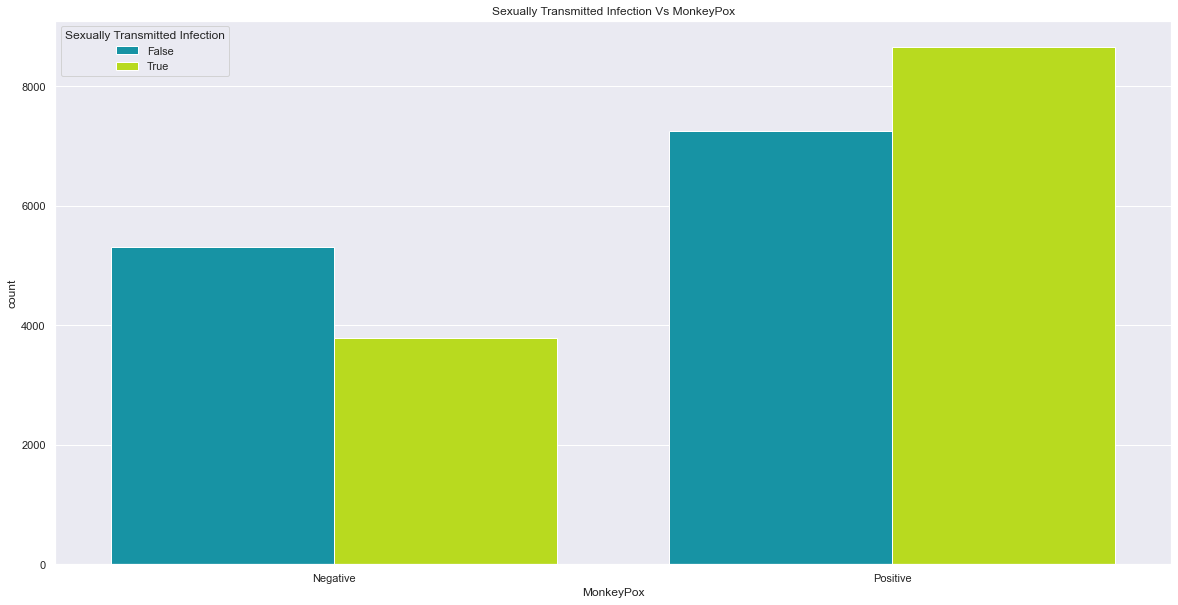

In [240]:
plt.figure(figsize=(20,10))
plt.title('Sexually Transmitted Infection Vs MonkeyPox')
sns.countplot(x='MonkeyPox',data=main_data,hue='Sexually Transmitted Infection', palette = 'nipy_spectral');

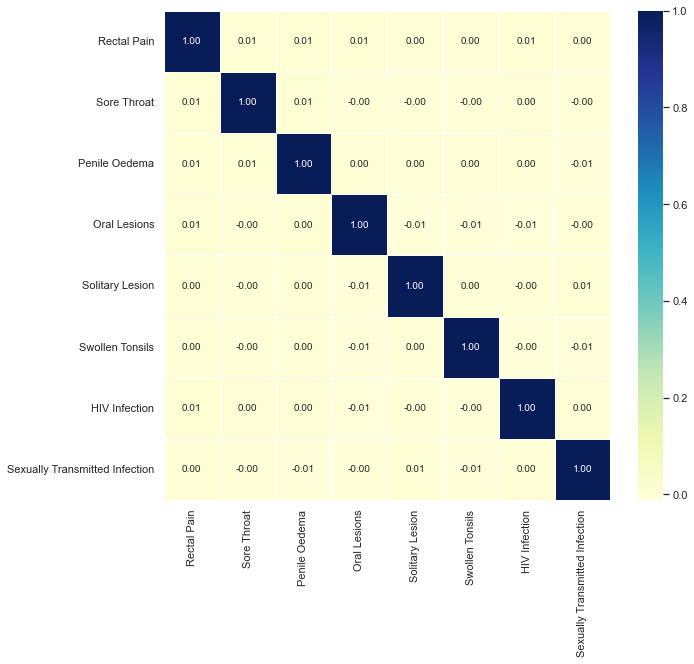

In [241]:
fig , ax = plt.subplots(figsize=(10,9))
sns.heatmap(main_data.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5);

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of DataSet</h2>
</div>

- Handling "Systemic Illness" Variable
- Handling "Rectal Pain" Variable
- Handling "Sore Throat" Variable
- Handling "Penile Oedema" Variable
- Handling "Oral Lesions" Variable
- Handling "Solitary Lesion" Variable
- Handling "Swollen Tonsils" Variable
- Handling "HIV Infection" Variable
- Handling "Sexually Transmitted Infection" Variable
- Handling "MonkeyPox" Variable

In [242]:
le=LabelEncoder()
main_data['Systemic Illness'] = le.fit_transform(main_data['Systemic Illness'])
main_data['Rectal Pain'] = le.fit_transform(main_data['Rectal Pain'])

main_data['Sore Throat'] = le.fit_transform(main_data['Sore Throat'])
main_data['Penile Oedema'] = le.fit_transform(main_data['Penile Oedema'])

main_data['Oral Lesions'] = le.fit_transform(main_data['Oral Lesions'])
main_data['Solitary Lesion'] = le.fit_transform(main_data['Solitary Lesion'])

main_data['Swollen Tonsils'] = le.fit_transform(main_data['Swollen Tonsils'])
main_data['HIV Infection'] = le.fit_transform(main_data['HIV Infection'])

main_data['Sexually Transmitted Infection'] = le.fit_transform(main_data['Sexually Transmitted Infection'])
main_data['MonkeyPox'] = le.fit_transform(main_data['MonkeyPox'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from DataSet</h2>
</div>

In [243]:
main_data = main_data.drop(['Patient_ID'],axis=1)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in DataSet</h2>
</div>


In [244]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Systemic Illness                25000 non-null  int32
 1   Rectal Pain                     25000 non-null  int64
 2   Sore Throat                     25000 non-null  int64
 3   Penile Oedema                   25000 non-null  int64
 4   Oral Lesions                    25000 non-null  int64
 5   Solitary Lesion                 25000 non-null  int64
 6   Swollen Tonsils                 25000 non-null  int64
 7   HIV Infection                   25000 non-null  int64
 8   Sexually Transmitted Infection  25000 non-null  int64
 9   MonkeyPox                       25000 non-null  int32
dtypes: int32(2), int64(8)
memory usage: 1.7 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [245]:
X = main_data.drop('MonkeyPox', axis='columns')
y = main_data['MonkeyPox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1-  Logistic Regression</h2>
</div>

In [246]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model1.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Logistic Regression is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Logistic Regression on training set: 0.66
Accuracy of Logistic Regression on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.60      0.26      0.36      1818
           1       0.68      0.90      0.77      3182

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.67      0.62      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Logistic Regression is equal 66.68 %.


#### * Hyper Parameter Tuning for Logistic Regression

In [125]:
solvers = ['newton-cg', 'sag', 'lbfgs']
penalty = ['l2','l1']
C = [0.01, 0.1, 1.0, 10, 100]
param = dict(solver=solvers, penalty=penalty, C=C)
random_search = RandomizedSearchCV(estimator=model1, param_distributions=param, cv=5, scoring='accuracy')
random_result = random_search.fit(X_train, y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",random_result.best_params_)
print('-------------'*9)
print("Best Score:- \n",random_result.best_score_)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.6632


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting Logistic Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [247]:
model2 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.1, random_state=42)
model2.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model2.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Logistic Regression is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Logistic Regression on training set: 0.66
Accuracy of Logistic Regression on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.60      0.25      0.36      1818
           1       0.68      0.90      0.78      3182

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.67      0.62      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Logistic Regression is equal 66.72 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Random Forest Classifier</h2>
</div>

In [248]:
model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model3.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Random Forest Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Random Forest Classifier on training set: 0.71
Accuracy of Random Forest Classifier on test set: 0.68
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.60      0.33      0.43      1818
           1       0.70      0.88      0.78      3182

    accuracy                           0.68      5000
   macro avg       0.65      0.60      0.60      5000
weighted avg       0.66      0.68      0.65      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Random Forest Classifier is equal 67.84 %.


#### * Hyper Parameter Tuning for Random Forest Classifier

In [129]:
n_estimators = [10, 50, 100, 200]
max_depth = [4, 6, 8, 10]
max_features =  ['sqrt', 'auto', 'log2']
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [3, 5, 10] 
bootstrap = [True, False]
grid = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features
            , min_samples_split = min_samples_split, min_samples_leaf=min_samples_leaf
            , bootstrap=bootstrap)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
random_search = RandomizedSearchCV(estimator=model3, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy')
random_result = random_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",random_result.best_params_)
print('-------------'*9)
print("Best Score:- \n",random_result.best_score_)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': False}
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.6911833333333335


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [249]:
model4 = RandomForestClassifier(n_estimators = 200, min_samples_split = 3, min_samples_leaf = 3
                                , max_features = 'auto', max_depth = 8, bootstrap = False,random_state=0)
model4.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model4.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Random Forest Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Random Forest Classifier on training set: 0.70
Accuracy of Random Forest Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.30      0.42      1818
           1       0.70      0.91      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.68      0.61      0.60      5000
weighted avg       0.69      0.69      0.65      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Random Forest Classifier is equal 69.14 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- LGBM Classifier</h2>
</div>

In [250]:
model5 = LGBMClassifier(random_state=0)
model5.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model5.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of LGBM Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of LGBM Classifier on training set: 0.70
Accuracy of LGBM Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.66      0.31      0.42      1818
           1       0.70      0.91      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.68      0.61      0.60      5000
weighted avg       0.68      0.69      0.65      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of LGBM Classifier is equal 69.02 %.


#### * Hyper Parameter Tuning for LGBM Classifier

In [132]:
boosting_type = ['gbdt','dart','goss']
num_leaves = [10, 20, 30, 40, 50]
max_depth = [-1, 5, 10, 15, 20]
learning_rate = [0.03, 0.07, 0.3]
n_estimators = [100, 200, 300, 400, 500]
min_child_samples = [20, 40]
colsample_bytree = [0.5, 1]
reg_alpha = [2]
reg_lambda = [2]
param = dict(boosting_type=boosting_type, num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate,
            n_estimators=n_estimators, min_child_samples=min_child_samples, colsample_bytree=colsample_bytree,
            reg_alpha=reg_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
lgbm_search = RandomizedSearchCV(estimator=model5, param_distributions=param, n_jobs=-1, cv=cv, scoring='accuracy')
lgbm_result = lgbm_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",lgbm_result.best_params_)
print('-------------'*9)
print("Best Score:- \n",lgbm_result.best_score_)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'reg_alpha': 2, 'num_leaves': 50, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.07, 'colsample_bytree': 0.5, 'boosting_type': 'dart'}
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.6928333333333333


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Fitting LGBM Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [251]:
model6 = LGBMClassifier(reg_alpha = 2, num_leaves = 50, n_estimators = 100
                        , min_child_samples = 20, max_depth = 10, learning_rate = 0.07
                        , colsample_bytree = 0.5, boosting_type = 'dart',random_state=0)
model6.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model6.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model6.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of LGBM Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of LGBM Classifier on training set: 0.70
Accuracy of LGBM Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.66      0.31      0.42      1818
           1       0.70      0.91      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.68      0.61      0.61      5000
weighted avg       0.68      0.69      0.66      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of LGBM Classifier is equal 69.16 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- CatBoost Classifier</h2>
</div>

In [252]:
model7 = CatBoostClassifier(random_state=0)
model7.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model7.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model7.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of CatBoost Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Learning rate set to 0.037023
0:	learn: 0.6856306	total: 224ms	remaining: 3m 44s
1:	learn: 0.6786352	total: 243ms	remaining: 2m 1s
2:	learn: 0.6730319	total: 257ms	remaining: 1m 25s
3:	learn: 0.6672439	total: 270ms	remaining: 1m 7s
4:	learn: 0.6617127	total: 283ms	remaining: 56.4s
5:	learn: 0.6566160	total: 298ms	remaining: 49.3s
6:	learn: 0.6520865	total: 313ms	remaining: 44.4s
7:	learn: 0.6477525	total: 326ms	remaining: 40.4s
8:	learn: 0.6436375	total: 344ms	remaining: 37.8s
9:	learn: 0.6399484	total: 361ms	remaining: 35.7s
10:	learn: 0.6370448	total: 373ms	remaining: 33.5s
11:	learn: 0.6340120	total: 386ms	remaining: 31.8s
12:	learn: 0.6309637	total: 401ms	remaining: 30.5s
13:	learn: 0.6293364	total: 413ms	remaining: 29.1s
14:	learn: 0.6266554	total: 427ms	remaining: 28s
15:	learn: 0.6241799	total: 440ms	remaining: 27s
16:	learn: 0.6218982	total: 457ms	remaining: 26.4s
17:	learn: 0.6207198	total: 467ms	remaining: 25.5s
18:	learn: 0.6187047	total: 481ms	remaining: 24.9s
19:	learn: 0.

165:	learn: 0.5857378	total: 3.44s	remaining: 17.3s
166:	learn: 0.5856942	total: 3.46s	remaining: 17.2s
167:	learn: 0.5856916	total: 3.46s	remaining: 17.2s
168:	learn: 0.5856915	total: 3.47s	remaining: 17.1s
169:	learn: 0.5856915	total: 3.49s	remaining: 17s
170:	learn: 0.5856636	total: 3.5s	remaining: 17s
171:	learn: 0.5856636	total: 3.52s	remaining: 16.9s
172:	learn: 0.5856135	total: 3.54s	remaining: 16.9s
173:	learn: 0.5856131	total: 3.55s	remaining: 16.8s
174:	learn: 0.5855793	total: 3.57s	remaining: 16.8s
175:	learn: 0.5855136	total: 3.58s	remaining: 16.8s
176:	learn: 0.5854689	total: 3.6s	remaining: 16.7s
177:	learn: 0.5854396	total: 3.62s	remaining: 16.7s
178:	learn: 0.5854381	total: 3.63s	remaining: 16.7s
179:	learn: 0.5854378	total: 3.64s	remaining: 16.6s
180:	learn: 0.5854106	total: 3.66s	remaining: 16.6s
181:	learn: 0.5853773	total: 3.68s	remaining: 16.5s
182:	learn: 0.5853768	total: 3.69s	remaining: 16.5s
183:	learn: 0.5853362	total: 3.71s	remaining: 16.5s
184:	learn: 0.5853

334:	learn: 0.5819712	total: 5.76s	remaining: 11.4s
335:	learn: 0.5819451	total: 5.77s	remaining: 11.4s
336:	learn: 0.5819124	total: 5.78s	remaining: 11.4s
337:	learn: 0.5818851	total: 5.8s	remaining: 11.4s
338:	learn: 0.5818628	total: 5.81s	remaining: 11.3s
339:	learn: 0.5818405	total: 5.82s	remaining: 11.3s
340:	learn: 0.5818053	total: 5.84s	remaining: 11.3s
341:	learn: 0.5817754	total: 5.85s	remaining: 11.3s
342:	learn: 0.5817514	total: 5.87s	remaining: 11.2s
343:	learn: 0.5817299	total: 5.88s	remaining: 11.2s
344:	learn: 0.5817182	total: 5.9s	remaining: 11.2s
345:	learn: 0.5816866	total: 5.92s	remaining: 11.2s
346:	learn: 0.5816649	total: 5.93s	remaining: 11.2s
347:	learn: 0.5816405	total: 5.95s	remaining: 11.1s
348:	learn: 0.5816125	total: 5.96s	remaining: 11.1s
349:	learn: 0.5815798	total: 5.97s	remaining: 11.1s
350:	learn: 0.5815528	total: 5.99s	remaining: 11.1s
351:	learn: 0.5815306	total: 6.01s	remaining: 11.1s
352:	learn: 0.5815102	total: 6.03s	remaining: 11s
353:	learn: 0.58

497:	learn: 0.5788251	total: 8.11s	remaining: 8.17s
498:	learn: 0.5788145	total: 8.12s	remaining: 8.15s
499:	learn: 0.5787946	total: 8.13s	remaining: 8.13s
500:	learn: 0.5787792	total: 8.14s	remaining: 8.11s
501:	learn: 0.5787662	total: 8.16s	remaining: 8.09s
502:	learn: 0.5787512	total: 8.17s	remaining: 8.07s
503:	learn: 0.5787386	total: 8.18s	remaining: 8.05s
504:	learn: 0.5787259	total: 8.2s	remaining: 8.04s
505:	learn: 0.5787141	total: 8.21s	remaining: 8.02s
506:	learn: 0.5787012	total: 8.22s	remaining: 8s
507:	learn: 0.5786881	total: 8.24s	remaining: 7.98s
508:	learn: 0.5786757	total: 8.25s	remaining: 7.96s
509:	learn: 0.5786653	total: 8.27s	remaining: 7.94s
510:	learn: 0.5786563	total: 8.28s	remaining: 7.92s
511:	learn: 0.5786448	total: 8.29s	remaining: 7.9s
512:	learn: 0.5786328	total: 8.31s	remaining: 7.88s
513:	learn: 0.5786159	total: 8.32s	remaining: 7.87s
514:	learn: 0.5785979	total: 8.33s	remaining: 7.85s
515:	learn: 0.5785873	total: 8.35s	remaining: 7.83s
516:	learn: 0.578

658:	learn: 0.5770118	total: 10.5s	remaining: 5.42s
659:	learn: 0.5770029	total: 10.5s	remaining: 5.41s
660:	learn: 0.5769960	total: 10.5s	remaining: 5.39s
661:	learn: 0.5769857	total: 10.5s	remaining: 5.37s
662:	learn: 0.5769758	total: 10.5s	remaining: 5.36s
663:	learn: 0.5769669	total: 10.6s	remaining: 5.34s
664:	learn: 0.5769591	total: 10.6s	remaining: 5.33s
665:	learn: 0.5769511	total: 10.6s	remaining: 5.31s
666:	learn: 0.5769383	total: 10.6s	remaining: 5.3s
667:	learn: 0.5769289	total: 10.6s	remaining: 5.28s
668:	learn: 0.5769146	total: 10.6s	remaining: 5.26s
669:	learn: 0.5769052	total: 10.7s	remaining: 5.25s
670:	learn: 0.5768958	total: 10.7s	remaining: 5.24s
671:	learn: 0.5768868	total: 10.7s	remaining: 5.22s
672:	learn: 0.5768783	total: 10.7s	remaining: 5.21s
673:	learn: 0.5768709	total: 10.7s	remaining: 5.19s
674:	learn: 0.5768604	total: 10.8s	remaining: 5.18s
675:	learn: 0.5768552	total: 10.8s	remaining: 5.16s
676:	learn: 0.5768402	total: 10.8s	remaining: 5.15s
677:	learn: 0

824:	learn: 0.5757626	total: 13.1s	remaining: 2.77s
825:	learn: 0.5757562	total: 13.1s	remaining: 2.76s
826:	learn: 0.5757509	total: 13.1s	remaining: 2.74s
827:	learn: 0.5757447	total: 13.1s	remaining: 2.73s
828:	learn: 0.5757374	total: 13.1s	remaining: 2.71s
829:	learn: 0.5757322	total: 13.2s	remaining: 2.69s
830:	learn: 0.5757246	total: 13.2s	remaining: 2.68s
831:	learn: 0.5757198	total: 13.2s	remaining: 2.66s
832:	learn: 0.5757127	total: 13.2s	remaining: 2.64s
833:	learn: 0.5757080	total: 13.2s	remaining: 2.63s
834:	learn: 0.5757029	total: 13.2s	remaining: 2.61s
835:	learn: 0.5756952	total: 13.2s	remaining: 2.59s
836:	learn: 0.5756907	total: 13.2s	remaining: 2.58s
837:	learn: 0.5756848	total: 13.3s	remaining: 2.56s
838:	learn: 0.5756795	total: 13.3s	remaining: 2.55s
839:	learn: 0.5756754	total: 13.3s	remaining: 2.53s
840:	learn: 0.5756724	total: 13.3s	remaining: 2.51s
841:	learn: 0.5756638	total: 13.3s	remaining: 2.5s
842:	learn: 0.5756558	total: 13.3s	remaining: 2.48s
843:	learn: 0

986:	learn: 0.5749024	total: 15.3s	remaining: 201ms
987:	learn: 0.5748982	total: 15.3s	remaining: 186ms
988:	learn: 0.5748932	total: 15.3s	remaining: 170ms
989:	learn: 0.5748906	total: 15.3s	remaining: 155ms
990:	learn: 0.5748867	total: 15.3s	remaining: 139ms
991:	learn: 0.5748822	total: 15.3s	remaining: 124ms
992:	learn: 0.5748788	total: 15.4s	remaining: 108ms
993:	learn: 0.5748748	total: 15.4s	remaining: 92.8ms
994:	learn: 0.5748667	total: 15.4s	remaining: 77.3ms
995:	learn: 0.5748628	total: 15.4s	remaining: 61.8ms
996:	learn: 0.5748582	total: 15.4s	remaining: 46.4ms
997:	learn: 0.5748543	total: 15.4s	remaining: 30.9ms
998:	learn: 0.5748510	total: 15.4s	remaining: 15.4ms
999:	learn: 0.5748463	total: 15.4s	remaining: 0us
Accuracy of CatBoost Classifier on training set: 0.70
Accuracy of CatBoost Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

 

#### * Hyper Parameter Tuning for CatBoost Classifier

In [137]:
parameters = {'depth': [4,5,6,7,8,9, 10]
              ,'learning_rate' : [0.01,0.02,0.03,0.04]
              ,'iterations' : [10, 20,30,40,50,60,70,80,90, 100]
             }
Grid_m7 = GridSearchCV(estimator=model7, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_m7.fit(X_train, y_train)
print('-------------'*9)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_m7.best_estimator_)
print('-------------'*9)
print("\n The best score across ALL searched params:\n",Grid_m7.best_score_)
print('-------------'*9)
print("\n The best parameters across ALL searched params:\n",Grid_m7.best_params_)

0:	learn: 0.6871193	total: 6.52ms	remaining: 515ms
1:	learn: 0.6814208	total: 12.7ms	remaining: 496ms
2:	learn: 0.6759253	total: 18.2ms	remaining: 468ms
3:	learn: 0.6708436	total: 23.6ms	remaining: 448ms
4:	learn: 0.6662630	total: 29.7ms	remaining: 445ms
5:	learn: 0.6618688	total: 35.1ms	remaining: 432ms
6:	learn: 0.6578040	total: 40.4ms	remaining: 421ms
7:	learn: 0.6541069	total: 45.6ms	remaining: 410ms
8:	learn: 0.6505830	total: 50.7ms	remaining: 400ms
9:	learn: 0.6473445	total: 57.4ms	remaining: 402ms
10:	learn: 0.6444311	total: 62.6ms	remaining: 393ms
11:	learn: 0.6415588	total: 68ms	remaining: 385ms
12:	learn: 0.6389096	total: 73.8ms	remaining: 380ms
13:	learn: 0.6364115	total: 79.2ms	remaining: 373ms
14:	learn: 0.6340816	total: 84.9ms	remaining: 368ms
15:	learn: 0.6320886	total: 90.3ms	remaining: 361ms
16:	learn: 0.6300146	total: 96.6ms	remaining: 358ms
17:	learn: 0.6280901	total: 102ms	remaining: 353ms
18:	learn: 0.6262735	total: 108ms	remaining: 347ms
19:	learn: 0.6246408	total

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Fitting CatBoost Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [253]:
model8 = CatBoostClassifier(depth = 4, iterations = 80, learning_rate = 0.04, random_state=0)
model8.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model8.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model8.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of CatBoost Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

0:	learn: 0.6868170	total: 8ms	remaining: 632ms
1:	learn: 0.6811853	total: 14.8ms	remaining: 578ms
2:	learn: 0.6757214	total: 21ms	remaining: 539ms
3:	learn: 0.6706658	total: 27.4ms	remaining: 520ms
4:	learn: 0.6661384	total: 32.7ms	remaining: 491ms
5:	learn: 0.6618686	total: 38.5ms	remaining: 474ms
6:	learn: 0.6577803	total: 43.9ms	remaining: 458ms
7:	learn: 0.6540885	total: 49.9ms	remaining: 449ms
8:	learn: 0.6505464	total: 55.7ms	remaining: 439ms
9:	learn: 0.6472641	total: 61.9ms	remaining: 433ms
10:	learn: 0.6443984	total: 68.8ms	remaining: 432ms
11:	learn: 0.6415389	total: 74.9ms	remaining: 424ms
12:	learn: 0.6388993	total: 82.2ms	remaining: 424ms
13:	learn: 0.6364129	total: 88.4ms	remaining: 417ms
14:	learn: 0.6340836	total: 95.1ms	remaining: 412ms
15:	learn: 0.6321450	total: 102ms	remaining: 409ms
16:	learn: 0.6304005	total: 109ms	remaining: 405ms
17:	learn: 0.6284643	total: 116ms	remaining: 399ms
18:	learn: 0.6266324	total: 123ms	remaining: 394ms
19:	learn: 0.6250322	total: 129

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- KNeighbors Classifier</h2>
</div>

In [254]:
model9 = KNeighborsClassifier(n_jobs= -1)
model9.fit(X_train,y_train) 
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))

print('Accuracy of KNeighbors Classifier on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model9.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model9.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of KNeighbors Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of KNeighbors Classifier on training set: 0.67
Accuracy of KNeighbors Classifier on test set: 0.65
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.53      0.38      0.44      1818
           1       0.69      0.81      0.75      3182

    accuracy                           0.65      5000
   macro avg       0.61      0.59      0.59      5000
weighted avg       0.63      0.65      0.64      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of KNeighbors Classifier is equal 65.12 %.


#### * Hyper Parameter Tuning for KNeighbors Classifier

In [142]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

model = GridSearchCV(model9, param_grid=params, n_jobs=1)
model.fit(X_train,y_train)
print('-------------'*9)
print(" Results from Grid Search " )
print("Best Hyper Parameters:\n",model.best_params_)
print('-------------'*9)
print("\n The best score across ALL searched params:\n",model.best_score_)
print('-------------'*9)
print("\n The best parameters across ALL searched params:\n",model.best_params_)

---------------------------------------------------------------------------------------------------------------------
 Results from Grid Search 
Best Hyper Parameters:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'uniform'}
---------------------------------------------------------------------------------------------------------------------

 The best score across ALL searched params:
 0.6640499999999999
---------------------------------------------------------------------------------------------------------------------

 The best parameters across ALL searched params:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'uniform'}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Fitting KNeighbors Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [255]:
model10 = KNeighborsClassifier(algorithm = 'brute', leaf_size = 1
                              , n_neighbors = 9, weights = 'uniform',n_jobs= -1)
model10.fit(X_train,y_train) 
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))

print('Accuracy of KNeighbors Classifier on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model10.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model10.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of KNeighbors Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of KNeighbors Classifier on training set: 0.69
Accuracy of KNeighbors Classifier on test set: 0.66
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.56      0.37      0.44      1818
           1       0.70      0.83      0.76      3182

    accuracy                           0.66      5000
   macro avg       0.63      0.60      0.60      5000
weighted avg       0.65      0.66      0.64      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of KNeighbors Classifier is equal 66.42 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- XGB Classifier</h2>
</div>

In [256]:
model11 = XGBClassifier(random_state=0)

model11.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model11.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model11.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model11.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model11.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of XGB Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of XGB Classifier on training set: 0.70
Accuracy of XGB Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.32      0.42      1818
           1       0.70      0.89      0.78      3182

    accuracy                           0.69      5000
   macro avg       0.66      0.61      0.60      5000
weighted avg       0.67      0.69      0.65      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of XGB Classifier is equal 68.52 %.


#### * Hyper Parameter Tuning for Hyper Parameter Tuning for XGB Classifier

In [145]:
params = {'max_depth': [3, 6, 10, 15],'min_child_weight' : [ 1, 3, 5, 7 ],'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
clf_search = RandomizedSearchCV(estimator=xgbclf,param_distributions=params,scoring='accuracy'
                         ,n_iter=25,n_jobs=4,verbose=1)
clf_result = clf_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",clf_result.best_params_)
print('-------------'*9)
print("Best Score:- \n",clf_result.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'subsample': 0.8999999999999999, 'num_class': 10, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7}
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.69255


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Fitting XGB Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [257]:
model12 = XGBClassifier(subsample = 0.8999999999999999, n_estimators = 500
                        , min_child_weight = 5, max_depth = 15
                        , learning_rate = 0.01, gamma = 0.2
                        , colsample_bytree = 0.6, colsample_bylevel = 0.7,random_state=0)

model12.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model12.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model12.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model12.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model12.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of XGB Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of XGB Classifier on training set: 0.70
Accuracy of XGB Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.65      0.32      0.43      1818
           1       0.70      0.90      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.68      0.61      0.61      5000
weighted avg       0.68      0.69      0.66      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of XGB Classifier is equal 69.12 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Linear Support Vector Classification</h2>
</div>

In [258]:
model13 = make_pipeline(StandardScaler(),LinearSVC())

model13.fit(X_train,y_train) 
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(model13.score(X_train, y_train)))

print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(model13.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model13.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model13.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Linear SVC is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Linear SVC on training set: 0.66
Accuracy of Linear SVC on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.61      0.24      0.35      1818
           1       0.68      0.91      0.78      3182

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.56      5000
weighted avg       0.65      0.67      0.62      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Linear SVC is equal 66.7 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Stochastic Gradient Descent Classifier</h2>
</div>

In [259]:
model14 = make_pipeline(StandardScaler(),SGDClassifier())

model14.fit(X_train,y_train) 
print('Accuracy of SGD Classifier on training set: {:.2f}'
     .format(model14.score(X_train, y_train)))

print('Accuracy of SGD Classifier on test set: {:.2f}'
     .format(model14.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model14.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model14.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of SGD Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of SGD Classifier on training set: 0.64
Accuracy of SGD Classifier on test set: 0.64
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1818
           1       0.64      1.00      0.78      3182

    accuracy                           0.64      5000
   macro avg       0.32      0.50      0.39      5000
weighted avg       0.41      0.64      0.49      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of SGD Classifier is equal 63.64 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Linear Support Vector Classification (Generate Probability Estimates)</h2>
</div>

In [260]:
mm = make_pipeline(StandardScaler(),LinearSVC())
model15 = CalibratedClassifierCV(mm)

model15.fit(X_train,y_train) 
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(model15.score(X_train, y_train)))

print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(model15.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model15.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model15.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Linear SVC is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Linear SVC on training set: 0.66
Accuracy of Linear SVC on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.60      0.26      0.36      1818
           1       0.68      0.90      0.78      3182

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.67      0.62      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Linear SVC is equal 66.8 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Stochastic Gradient Descent Classifier (Generate Probability Estimates)</h2>
</div>

In [261]:
ab = make_pipeline(StandardScaler(),SGDClassifier(loss = 'hinge'))
model16 = CalibratedClassifierCV(ab)

model16.fit(X_train,y_train) 
print('Accuracy of SGD Classifier on training set: {:.2f}'
     .format(model16.score(X_train, y_train)))

print('Accuracy of SGD Classifier on test set: {:.2f}'
     .format(model16.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model16.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model15.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Linear SVC is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of SGD Classifier on training set: 0.66
Accuracy of SGD Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.21      0.32      1818
           1       0.67      0.93      0.78      3182

    accuracy                           0.67      5000
   macro avg       0.65      0.57      0.55      5000
weighted avg       0.66      0.67      0.61      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Linear SVC is equal 66.8 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- AdaBoost Classifier</h2>
</div>

In [262]:
model17 = AdaBoostClassifier(random_state=42)

model17.fit(X_train,y_train) 
print('Accuracy of AdaBoost Classifier on training set: {:.2f}'
     .format(model17.score(X_train, y_train)))

print('Accuracy of AdaBoost Classifier on test set: {:.2f}'
     .format(model17.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model17.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model17.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of AdaBoost Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of AdaBoost Classifier on training set: 0.69
Accuracy of AdaBoost Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.37      0.46      1818
           1       0.71      0.87      0.78      3182

    accuracy                           0.69      5000
   macro avg       0.66      0.62      0.62      5000
weighted avg       0.67      0.69      0.66      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of AdaBoost Classifier is equal 68.76 %.


#### * Hyper Parameter Tuning for Hyper Parameter Tuning for AdaBoost Classifier

In [156]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}

ab_clf = AdaBoostClassifier(random_state=42)
clf_search = GridSearchCV(ab_clf, parameters, cv=5, verbose=0, n_jobs=-1)
clf_result = clf_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",clf_result.best_estimator_)
print('-------------'*9)
print("Best Score:- \n",clf_result.best_score_)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 AdaBoostClassifier(learning_rate=0.97, n_estimators=10, random_state=42)
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.6925


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- Fitting AdaBoost Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [263]:
model18 = AdaBoostClassifier(learning_rate=0.97, n_estimators=10, random_state=42)

model18.fit(X_train,y_train) 
print('Accuracy of AdaBoost Classifier on training set: {:.2f}'
     .format(model18.score(X_train, y_train)))

print('Accuracy of AdaBoost Classifier on test set: {:.2f}'
     .format(model18.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model18.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model18.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of AdaBoost Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of AdaBoost Classifier on training set: 0.69
Accuracy of AdaBoost Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.36      0.46      1818
           1       0.71      0.88      0.78      3182

    accuracy                           0.69      5000
   macro avg       0.67      0.62      0.62      5000
weighted avg       0.68      0.69      0.66      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of AdaBoost Classifier is equal 69.08 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 19- MLP Classifier</h2>
</div>

In [264]:
model19 = MLPClassifier(random_state=99, activation='logistic')

model19.fit(X_train,y_train) 
print('Accuracy of MLP Classifier on training set: {:.2f}'
     .format(model19.score(X_train, y_train)))

print('Accuracy of MLP Classifier on test set: {:.2f}'
     .format(model19.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model19.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model19.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of MLP Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of MLP Classifier on training set: 0.66
Accuracy of MLP Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.58      0.32      0.41      1818
           1       0.69      0.86      0.77      3182

    accuracy                           0.67      5000
   macro avg       0.63      0.59      0.59      5000
weighted avg       0.65      0.67      0.64      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of MLP Classifier is equal 66.7 %.


#### * Hyper Parameter Tuning for Hyper Parameter Tuning for MLP Classifier

In [167]:
mlp_clf = MLPClassifier(random_state=99)
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 20- Fitting MLP Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [265]:
model20 = MLPClassifier(activation = 'tanh', alpha = 0.05, hidden_layer_sizes = (150, 100, 50)
                        , learning_rate = 'constant', max_iter = 100, solver = 'adam'
                        ,random_state=99)

model20.fit(X_train,y_train) 
print('Accuracy of MLP Classifier on training set: {:.2f}'
     .format(model20.score(X_train, y_train)))

print('Accuracy of MLP Classifier on test set: {:.2f}'
     .format(model20.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model20.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model20.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of MLP Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of MLP Classifier on training set: 0.69
Accuracy of MLP Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.26      0.38      1818
           1       0.69      0.93      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.69      0.60      0.59      5000
weighted avg       0.69      0.69      0.64      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of MLP Classifier is equal 68.92 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 21- Gradient Boosting Classifier</h2>
</div>

In [266]:
model21 = GradientBoostingClassifier(random_state = 0)

model21.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Classifier on training set: {:.2f}'
     .format(model21.score(X_train, y_train)))

print('Accuracy of Gradient BoostingClassifier on test set: {:.2f}'
     .format(model21.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model21.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model21.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Gradient Boosting Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Gradient Boosting Classifier on training set: 0.69
Accuracy of Gradient BoostingClassifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.35      0.45      1818
           1       0.70      0.89      0.78      3182

    accuracy                           0.69      5000
   macro avg       0.67      0.62      0.62      5000
weighted avg       0.68      0.69      0.66      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Gradient Boosting Classifier is equal 68.94 %.


#### * Hyper Parameter Tuning for Hyper Parameter Tuning for Gradient Boosting Classifier

In [173]:
grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),
    'max_depth':[2,3,4,5,6,7] 

}

gb = GradientBoostingClassifier(random_state = 0)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)



Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


In [179]:
gb_clf = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

gb = GradientBoostingClassifier(random_state = 0)

gb_cv = GridSearchCV(gb, gb_clf, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

Best Parameters: {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'n_estimators': 100}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 22- Fitting Gradient Boosting Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [267]:
model22 = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 2, n_estimators = 100
                                     ,random_state = 0, criterion = 'friedman_mse', max_features = 'sqrt')

model22.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Classifier on training set: {:.2f}'
     .format(model22.score(X_train, y_train)))

print('Accuracy of Gradient BoostingClassifier on test set: {:.2f}'
     .format(model22.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model22.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model22.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Gradient Boosting Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Gradient Boosting Classifier on training set: 0.69
Accuracy of Gradient BoostingClassifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.34      0.45      1818
           1       0.70      0.89      0.78      3182

    accuracy                           0.69      5000
   macro avg       0.67      0.61      0.61      5000
weighted avg       0.68      0.69      0.66      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Gradient Boosting Classifier is equal 68.88 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 23- Decision Tree Classifier</h2>
</div>

In [268]:
model23 = DecisionTreeClassifier(criterion='entropy', random_state=0)  

model23.fit(X_train,y_train) 
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'
     .format(model23.score(X_train, y_train)))

print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
     .format(model23.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model23.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model23.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Decision Tree Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Decision Tree Classifier on training set: 0.71
Accuracy of Decision Tree Classifier on test set: 0.68
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.59      0.34      0.44      1818
           1       0.70      0.87      0.77      3182

    accuracy                           0.68      5000
   macro avg       0.65      0.61      0.60      5000
weighted avg       0.66      0.68      0.65      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Decision Tree Classifier is equal 67.62 %.


#### * Hyper Parameter Tuning for Hyper Parameter Tuning for Decision Tree Classifier

In [180]:
dt = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=42)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 24- Fitting Decision Tree Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [269]:
model24 = DecisionTreeClassifier(criterion='entropy', max_depth=10
                                 , min_samples_leaf=100, random_state=42)  

model24.fit(X_train,y_train) 
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'
     .format(model24.score(X_train, y_train)))

print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
     .format(model24.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model24.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model24.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Decision Tree Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Decision Tree Classifier on training set: 0.70
Accuracy of Decision Tree Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.66      0.29      0.40      1818
           1       0.69      0.92      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.68      0.60      0.60      5000
weighted avg       0.68      0.69      0.65      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of Decision Tree Classifier is equal 68.86 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 25- Histogram Gradient Boosting Classifier</h2>
</div>

In [270]:
model25 = HistGradientBoostingClassifier(random_state=0)  

model25.fit(X_train,y_train) 
print('Accuracy of HistGradient Boosting Classifier on training set: {:.2f}'
     .format(model25.score(X_train, y_train)))

print('Accuracy of HistGradient Boosting Classifier on test set: {:.2f}'
     .format(model25.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model25.predict(X_test)),'\n')
print('-------------'*9)
y_pred = model25.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of HistGradient Boosting Classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of HistGradient Boosting Classifier on training set: 0.70
Accuracy of HistGradient Boosting Classifier on test set: 0.69
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.31      0.43      1818
           1       0.70      0.91      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.68      0.61      0.61      5000
weighted avg       0.69      0.69      0.66      5000
 

---------------------------------------------------------------------------------------------------------------------
Accuracy of HistGradient Boosting Classifier is equal 69.36 %.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [272]:
# Final Prediction using Histogram Gradient Boosting Classifier Model with best Hyperparameters generated by Grid Search
y_pred = model25.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Histogram Gradient Boosting Classifier is equal ' + str(round(accuracy, 2)) + ' %.')
print('-------------'*9)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of Histogram Gradient Boosting Classifierr is \n\n', cm,'\n')
print('-------------'*9)

Accuracy of Histogram Gradient Boosting Classifier is equal 69.36 %.
---------------------------------------------------------------------------------------------------------------------
Confusion Matrix of Histogram Gradient Boosting Classifierr is 

 [[ 567 1251]
 [ 281 2901]] 

---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

Best Score: 69.36 %

Best Model: Histogram Gradient Boosting Classifier